# Import Necessary Library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
import re # regular expression

# Read CSV

In [2]:
df = pd.read_csv('../input/forbes-billionaires-2022/2022_forbes_billionaires.csv')
df.head()

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


# Clean Data

#### Check Null Value

In [3]:
df.isnull().sum()

Unnamed: 0    0
rank          0
name          0
networth      0
age           0
country       0
source        0
industry      0
dtype: int64

#### Select Importan Columns

In [4]:
df = df[['name','networth','age','country','source','industry']]
df.head()

,name,networth,age,country,source,industry
0,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


#### Rename Columns

In [5]:
df = df.rename({'name':'Name','networth':'Networth','age':'Age','country':'Country','source':'Source','industry':'Industry'},axis = 1)
df.head()

,Name,Networth,Age,Country,Source,Industry
0,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


#### Clean 'Networth' Column

In [6]:
for i in range(len(df['Networth'])):
    a = df['Networth'].loc[i]
    a = re.sub('\$','',a)
    a = re.sub(' B','',a)
    df['Networth'].loc[i] = a
df.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Name,Networth,Age,Country,Source,Industry
0,Elon Musk,219,50,United States,"Tesla, SpaceX",Automotive
1,Jeff Bezos,171,58,United States,Amazon,Technology
2,Bernard Arnault & family,158,73,France,LVMH,Fashion & Retail
3,Bill Gates,129,66,United States,Microsoft,Technology
4,Warren Buffett,118,91,United States,Berkshire Hathaway,Finance & Investments


#### Change Data Type: Networth & Age

In [7]:
df['Networth'] = df['Networth'].astype(float)
df['Age'] = df['Age'].astype(float)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2600 non-null   object 
 1   Networth  2600 non-null   float64
 2   Age       2600 non-null   float64
 3   Country   2600 non-null   object 
 4   Source    2600 non-null   object 
 5   Industry  2600 non-null   object 
dtypes: float64(2), object(4)
memory usage: 122.0+ KB


,Name,Networth,Age,Country,Source,Industry
0,Elon Musk,219.0,50.0,United States,"Tesla, SpaceX",Automotive
1,Jeff Bezos,171.0,58.0,United States,Amazon,Technology
2,Bernard Arnault & family,158.0,73.0,France,LVMH,Fashion & Retail
3,Bill Gates,129.0,66.0,United States,Microsoft,Technology
4,Warren Buffett,118.0,91.0,United States,Berkshire Hathaway,Finance & Investments


# Number of Billionaire Based on Country

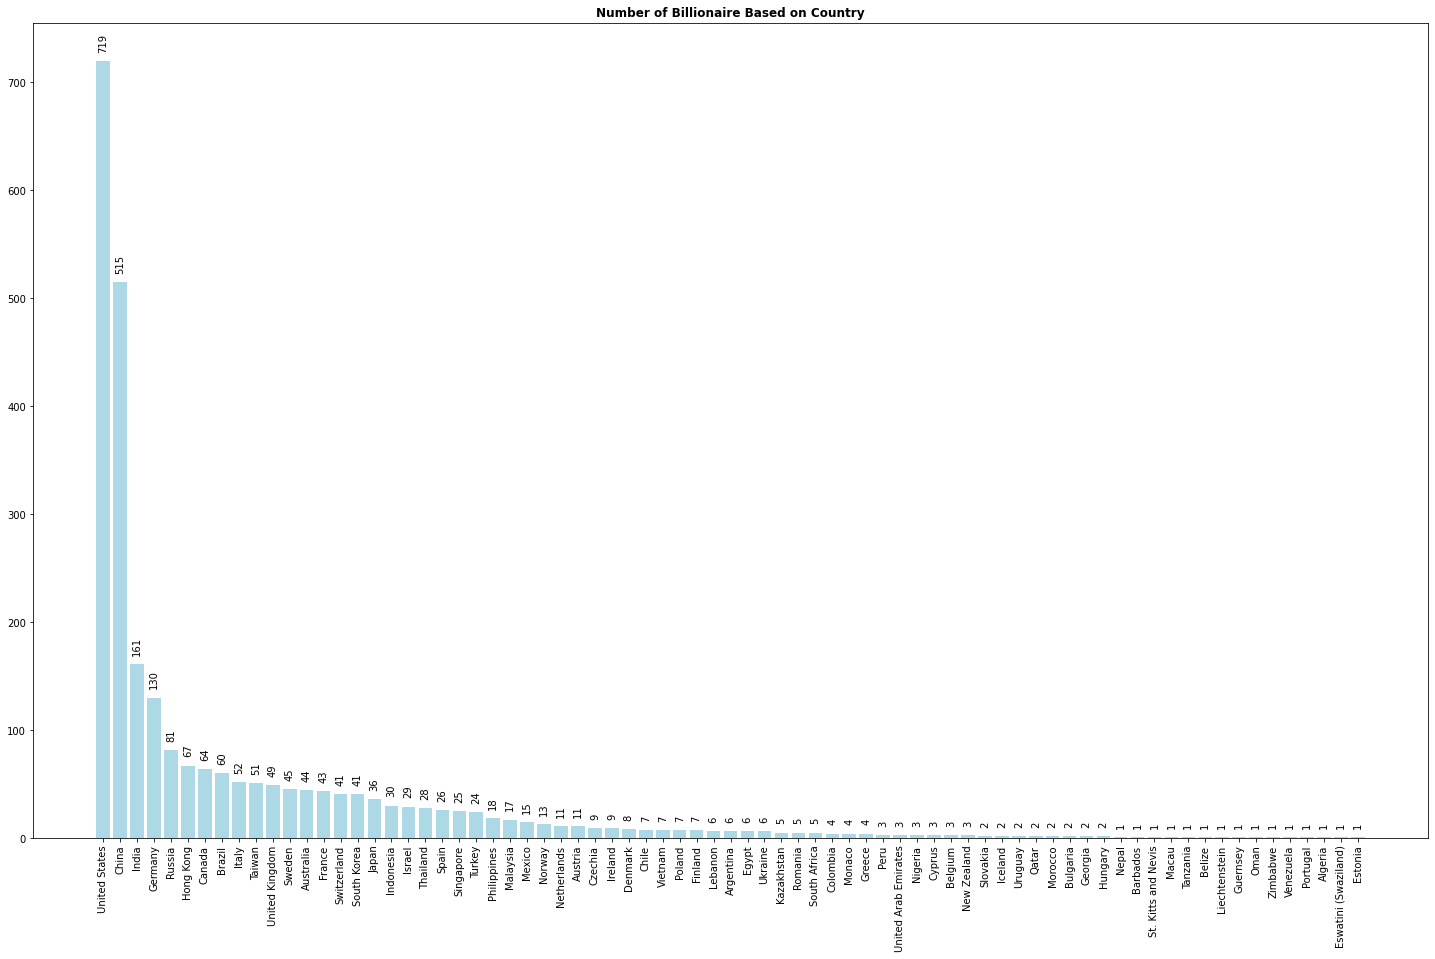

In [8]:
dataBBC = df['Country'].value_counts()
xBBC = dataBBC.index
yBBC = dataBBC.values

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+10, y[i], ha = 'center',rotation = 90) 
        
plt.figure(figsize = (25,15))
plt.bar(x = xBBC, height = yBBC, color = 'lightblue')
plt.xticks(rotation = 90)
addlabels(xBBC,yBBC)
plt.title('Number of Billionaire Based on Country', weight = 'bold')
plt.show()

# Number of Billionaire Based on Industry

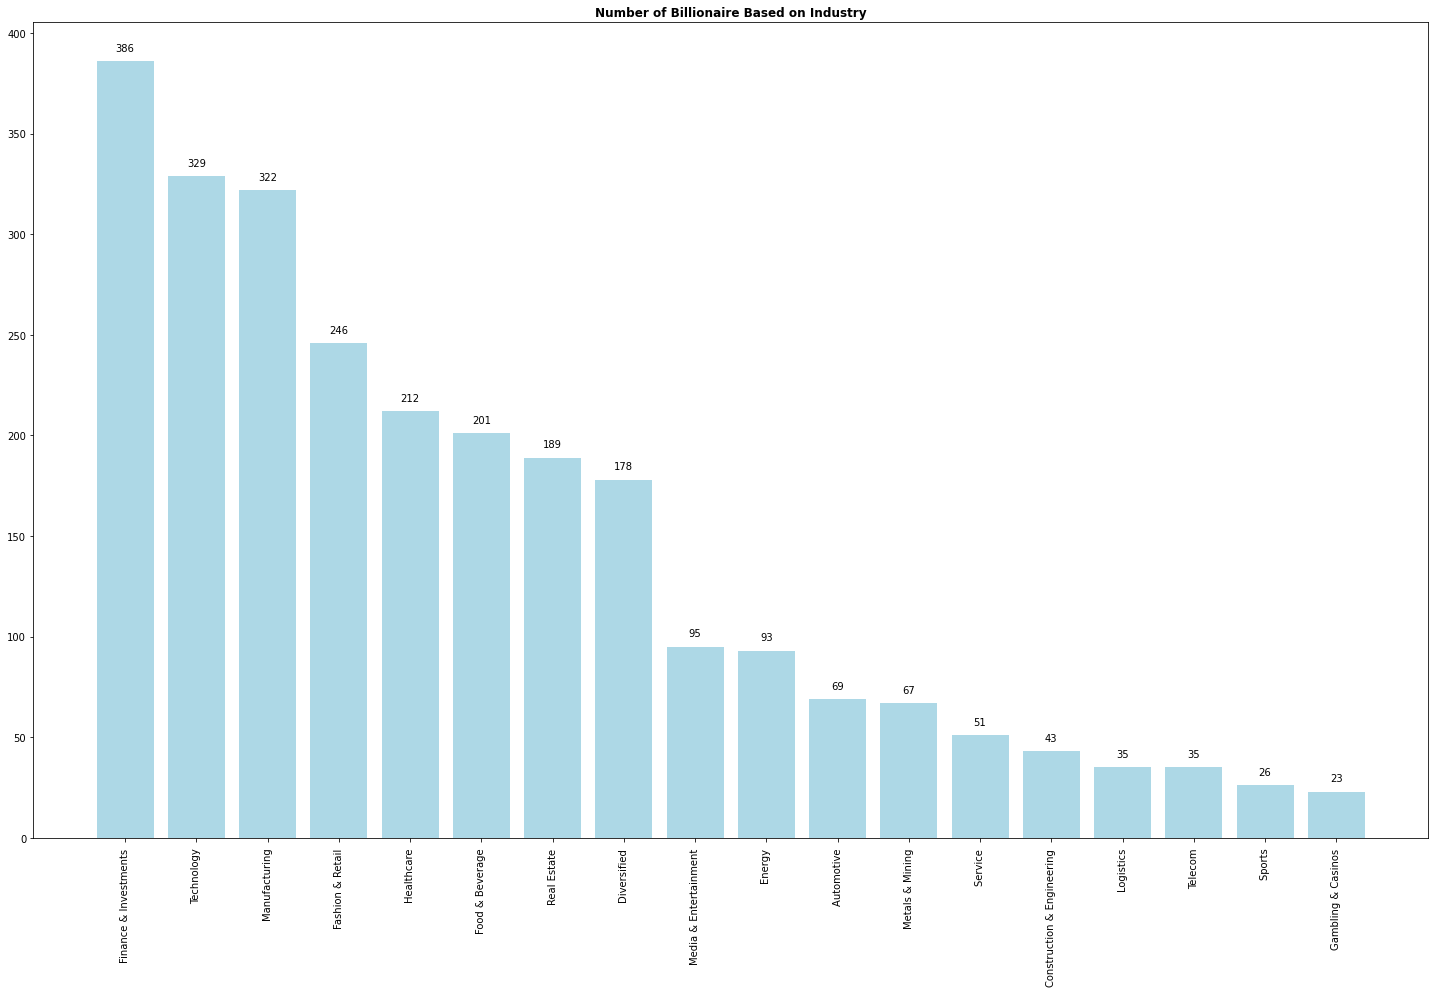

In [9]:
dataBBI = df['Industry'].value_counts()
xBBI = dataBBI.index
yBBI = dataBBI.values

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+5, y[i], ha = 'center') 

plt.figure(figsize = (25,15))
plt.bar(x = xBBI, height = yBBI, color = 'lightblue')
plt.xticks(rotation = 90)
addlabels(xBBI,yBBI)
plt.title('Number of Billionaire Based on Industry', weight = 'bold')
plt.show()

# Top 5 Rich People From each Industry

#### Define Function

In [10]:
def barLabel(x,y):
    for i in range(len(x)):
        text = str(y[i]) + ' Billion'
        position = y[i]+(y[i]*0.1)
        plt.text(i, position, text, ha = 'center') 

def createBar(text):
    data = df[['Name','Networth']].loc[df['Industry'] == text].head().copy()
    data = data.reset_index(drop = True)
    plt.figure(figsize = (8,5))
    plt.bar(x = data['Name'], height = data['Networth'], color = 'lightblue')
    title = 'Top 5 Rich People From '
    title = title + text
    title = title + 'Industry'
    plt.title(title)
    plt.xticks(rotation = 90)
    plt.ylim(0,(data['Networth'][0])+(data['Networth'][0]*0.25))
    barLabel(data['Name'],data['Networth'])
    plt.show()    

#### Run Function

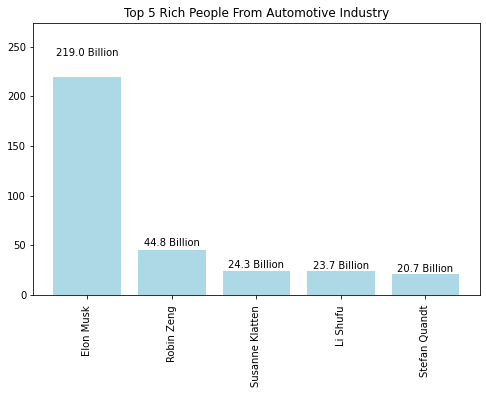

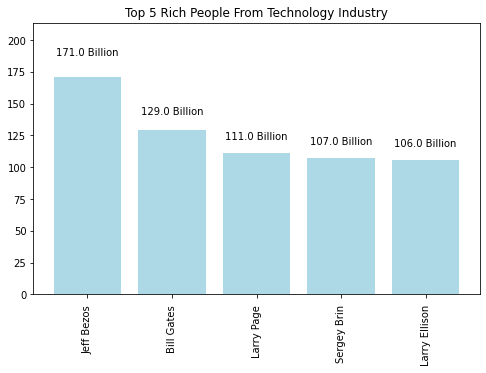

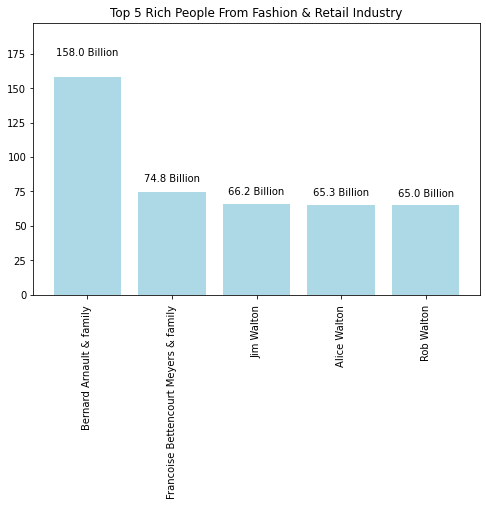

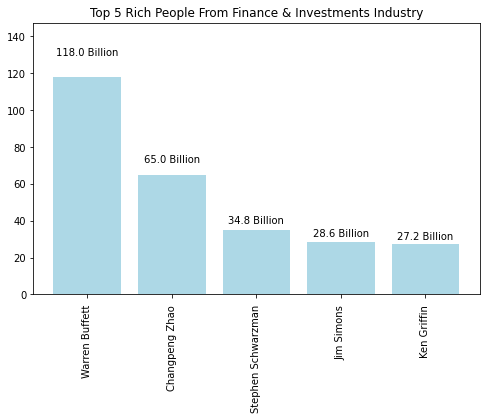

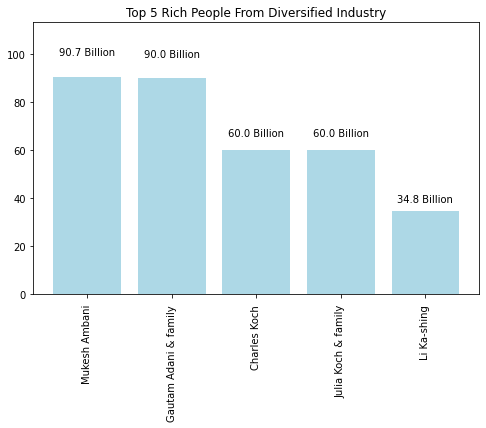

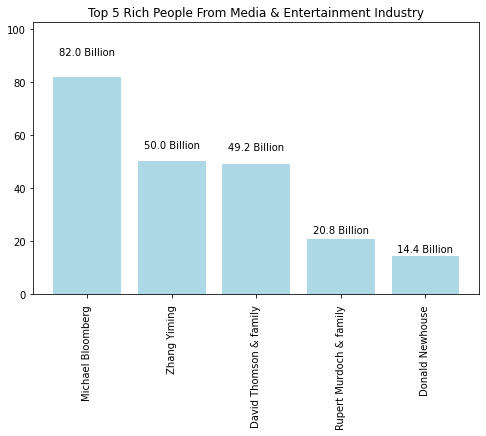

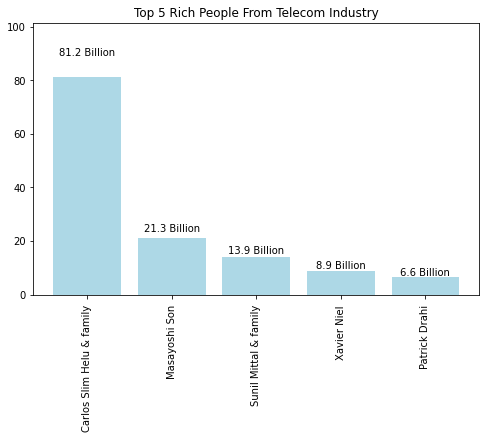

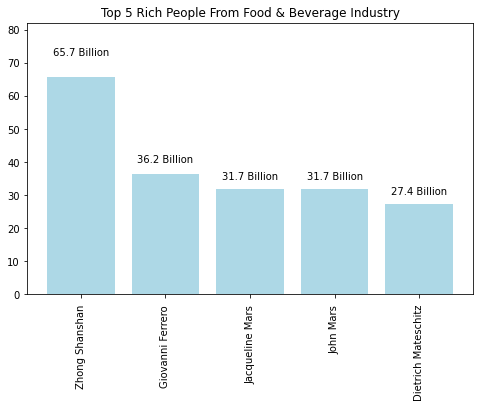

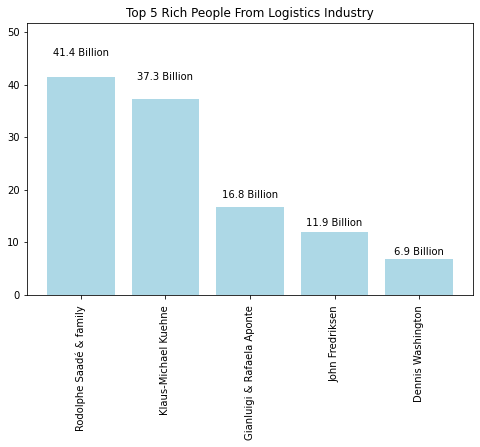

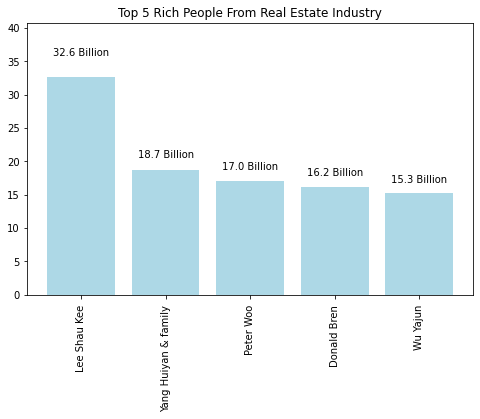

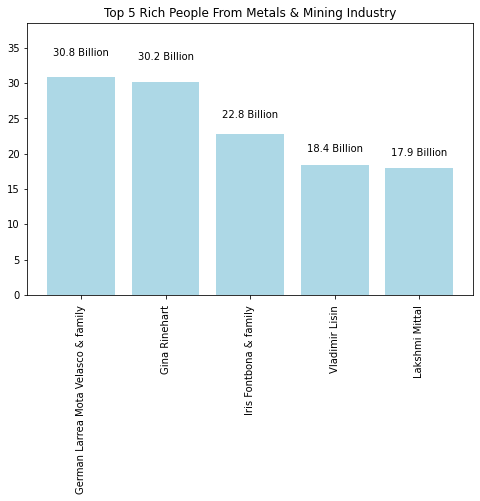

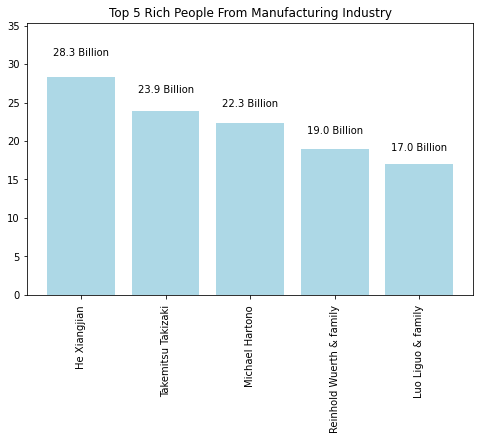

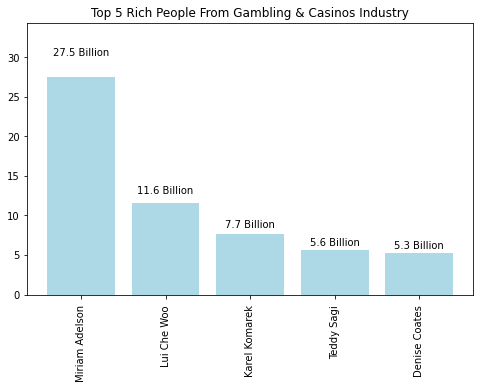

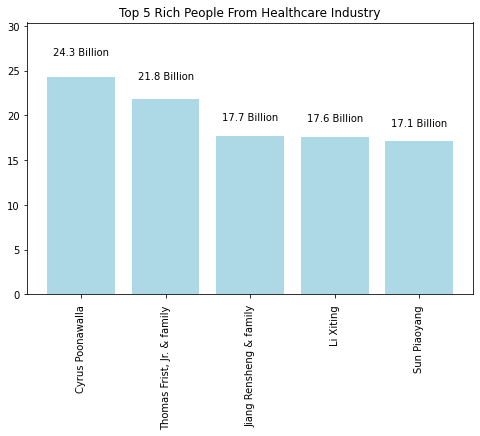

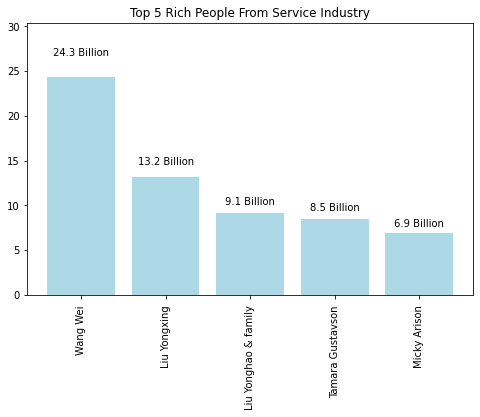

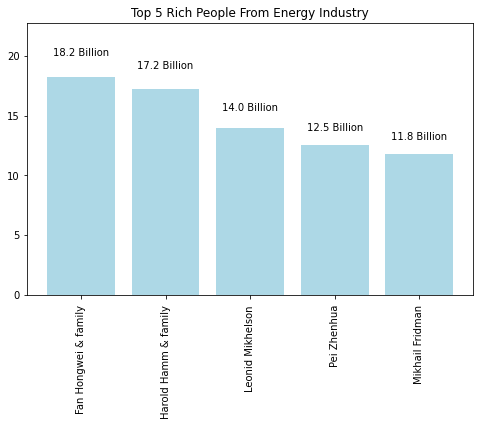

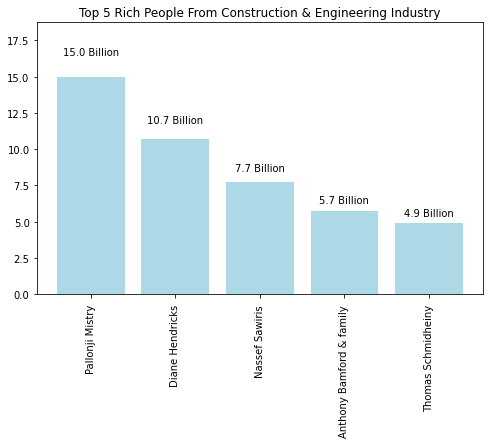

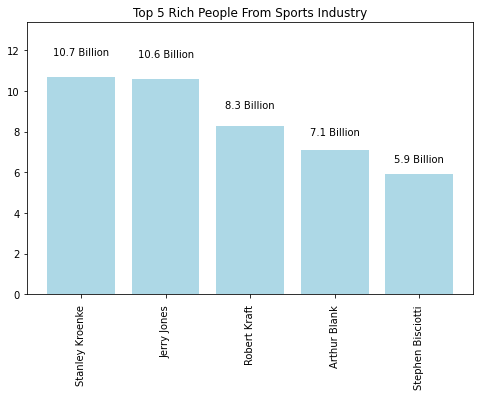

In [11]:
for i in range(len(df['Industry'].unique())):
    text = df['Industry'].unique()[i]
    createBar(text)

# Top 5 Rich People from United States, China, India, Germany and Rusia

#### Define Function

In [12]:
def createBar(text):
    data = df[['Name','Networth']].loc[df['Country'] == text].head().copy()
    data = data.reset_index(drop = True)
    plt.figure(figsize = (8,5))
    plt.bar(x = data['Name'], height = data['Networth'], color = 'lightblue')
    title = 'Top 5 Rich People From '
    title = title + text
    plt.title(title)
    plt.xticks(rotation = 90)
    plt.ylim(0,(data['Networth'][0])+(data['Networth'][0]*0.25))
    barLabel(data['Name'],data['Networth'])
    plt.show()    

#### Run Function

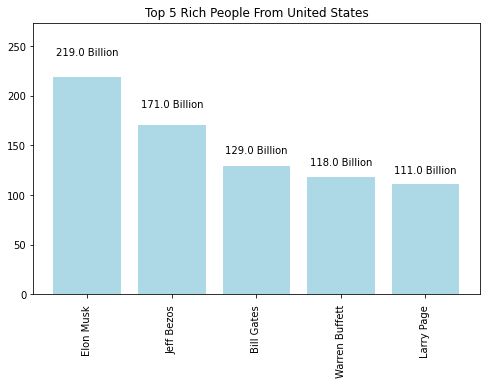

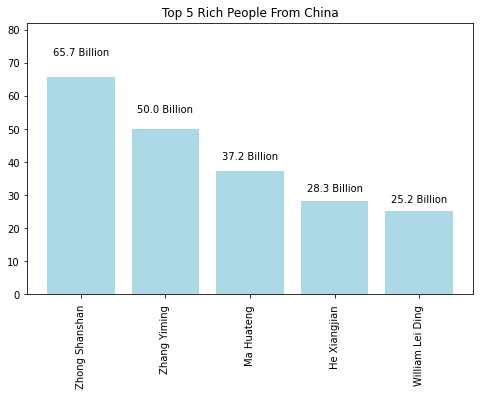

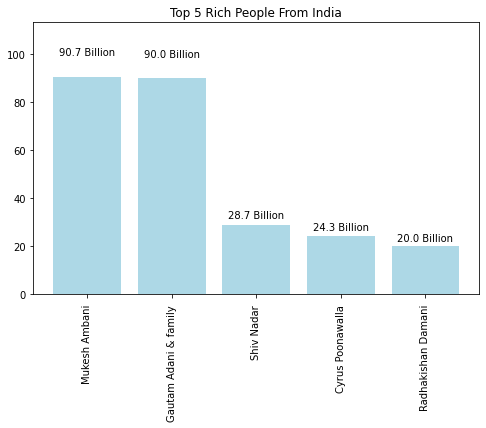

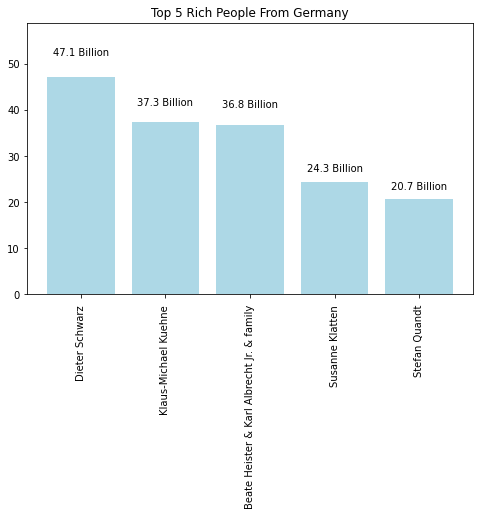

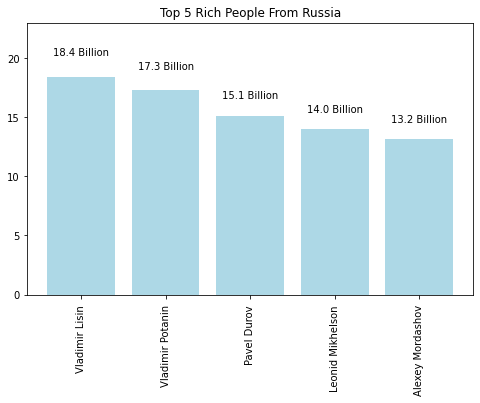

In [13]:
country = df['Country'].value_counts().head().index
for i in range(len(country)):
    createBar(country[i])

# 5 Most Youngest Rich People

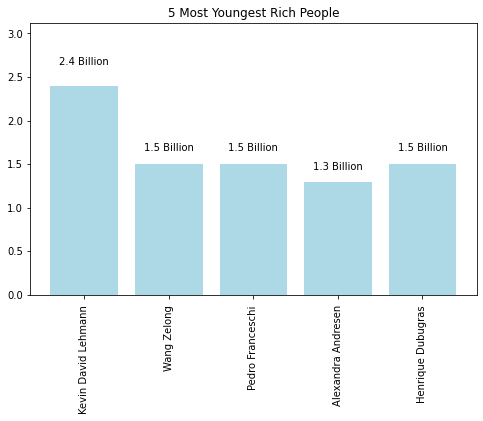

In [14]:
dataYRC = df.sort_values('Age',ascending = True).head().copy()
dataYRC = dataYRC.reset_index(drop = True)

plt.figure(figsize = (8,5))
plt.title('5 Most Youngest Rich People')
plt.bar(x = dataYRC['Name'], height = dataYRC['Networth'], color = 'lightblue')
plt.xticks(rotation = 90)
plt.ylim(0,dataYRC['Networth'][0]+(dataYRC['Networth'][0]*0.3))
barLabel(dataYRC['Name'],dataYRC['Networth'])
plt.show()


# 5 Most Oldest Rich People

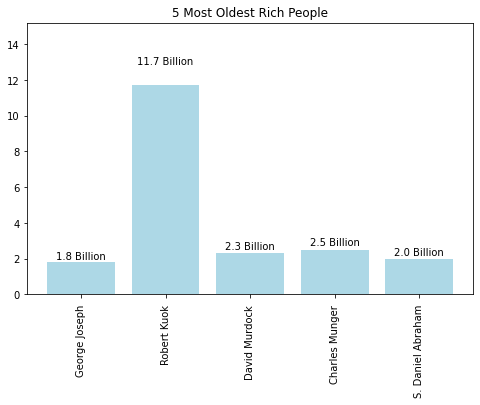

In [15]:
dataORC = df.sort_values('Age',ascending = False).head().copy()
dataORC = dataORC.reset_index(drop = True)

plt.figure(figsize = (8,5))
plt.title('5 Most Oldest Rich People')
plt.bar(x = dataORC['Name'], height = dataORC['Networth'], color = 'lightblue')
plt.xticks(rotation = 90)
plt.ylim(0,dataORC['Networth'][1]+(dataORC['Networth'][1]*0.3))
barLabel(dataORC['Name'],dataORC['Networth'])
plt.show()
